<a href="https://colab.research.google.com/github/MadhuraTonpe165/Assignments/blob/main/Leanear_Regression_Insurance_Assignment230425.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Getting data set from Kaggel
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

100%|██████████| 16.0k/16.0k [00:00<00:00, 10.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


In [5]:
# insurance dataset
df = pd.read_csv("/root/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1/insurance.csv")

#Loading first 5 rowa of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Finding the duplicate records
int(df.duplicated().sum())

1

In [6]:
# Dropping the duplicate records
df.drop_duplicates(inplace = True)

In [ ]:
# confirmation for no duplicate records
int(df.duplicated().sum())

0

In [ ]:
# No Duplicate reords in data now

In [ ]:
df.isnull().sum().any()

np.False_

In [ ]:
# Get an idea about the data types of the columns
# and comment whether they are in correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
'''
Conclusion ->
All the columns are in correct data types as expected
'''

In [ ]:
'''
Performing Statictical analysis on data
'''

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [ ]:
'''
1. From AGE column we can conclude we have data range from 18 to 64
2. From Children column we can conclude that data range is from 0 to 5
3. From charges column we can see that mean is greater than median, implying there are outliers in right tail
'''

In [ ]:
# Correlation analysis on the data and comment on it.

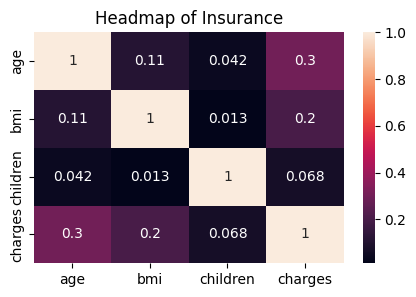

In [7]:
plt.figure(figsize = (5, 3))
sns.heatmap(df.corr(numeric_only= True), annot = True)
plt.title("Headmap of Insurance")
plt.show()

In [ ]:
# age and bmi have a weak correlation with charges

In [ ]:
# check data distribution by region
df["region"].value_counts().head()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


In [ ]:
# Data is almost equally distributed by region

In [ ]:
# check data distribution by smoker

df['smoker'].value_counts().head()

,count
smoker,
no,1063
yes,274


In [ ]:
# Data has most of the details of non smokers.

In [ ]:
df['sex'].value_counts().head()

,count
sex,
male,675
female,662


In [ ]:
# Data is almost equally distributed by sex

In [18]:
df['children'].value_counts().head()

,count
children,
0,574
1,324
2,240
3,157
4,25


In [ ]:
# the value of 0 children is much greater than 3 and 4 children

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
'''
Insurance dataset
---------------------------

**Data Set Characteristics:**

    :Number of Instances: 1338

    :Number of Attributes: 7 numeric/categorical predictive. Median Value (attribute 7) is usually the target.

    :Attribute Information (in order):
        - age
        - sex
        - bmi
        - children
        - smoker
        - region
        - charges

    Missing Attribute Values: None

'''

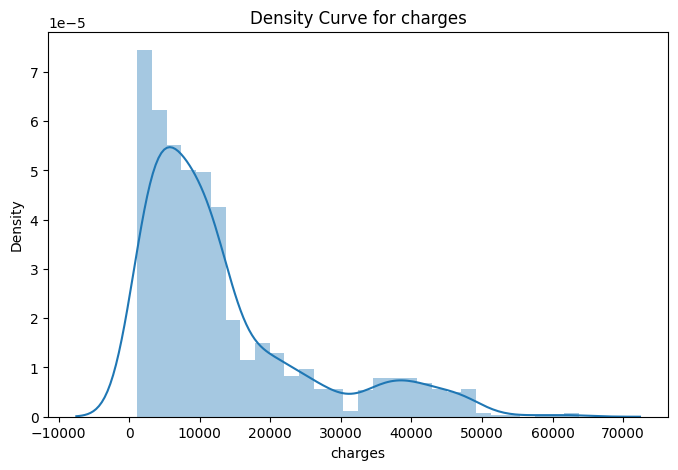

In [22]:
# Outlier Analysis on Target Variable
plt.figure(figsize = (8, 5))
sns.distplot(df['charges'], bins = 30)
plt.title('Density Curve for charges')
plt.show()

In [30]:
# Removing Outliers
df1 = df[df['charges'] < 3000].count()
print(df1)

age         191
sex         191
bmi         191
children    191
smoker      191
region      191
charges     191
dtype: int64


In [24]:
df1 = df[df['children'] < 4].sum().any()

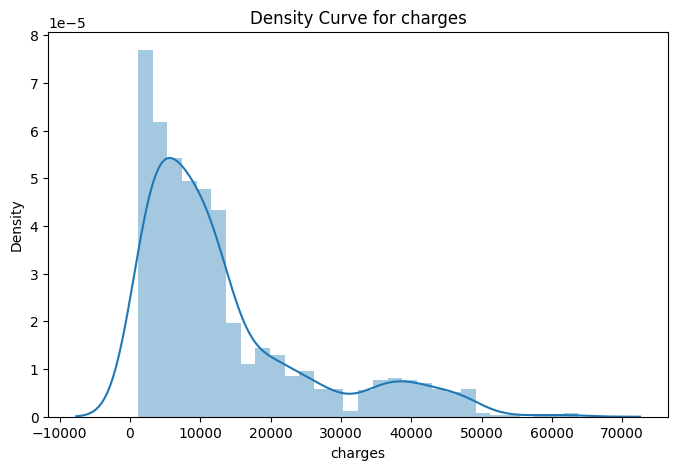

In [20]:
# Outlier Analysis on Target Variable
plt.figure(figsize = (8, 5))
sns.distplot(df1['charges'], bins = 30)
plt.title('Density Curve for charges')
plt.show()

In [13]:
# Removing Outliers
df = df[df['charges'] < 5000]

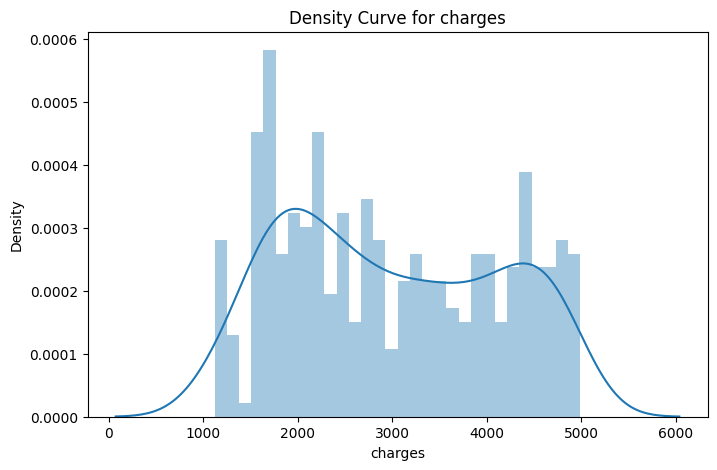

In [14]:
# Outlier Analysis on Target Variable
plt.figure(figsize = (8, 5))
sns.distplot(df['charges'], bins = 30)
plt.title('Density Curve for charges')
plt.show()

In [ ]:
# age and bmi could be the possible input features
# children is having the weak relationship w.r.t Target variable
# hence it would not be there in the ML model

In [ ]:
'''
We will create below model ->
1) age -> Charges (Simple Linear Regression)
2) age, bmi -> charges (Multiple Linear Regression)
'''

In [ ]:
# Simple Linear Regression

In [13]:
# Seperating input and output features
X = df['age'].to_numpy().reshape(-1, 1)
y = df['charges']

# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [14]:
# Initializing the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Taking predictions from the model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [16]:
# Model Evaluation
print('Testing R2 Score :', np.round(metrics.r2_score(y_test, y_pred), 2))
print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 2))

Testing R2 Score : 0.1
Training R2 Score : 0.09


In [17]:
print('Training RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 2))
print('Testing RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))

Training RMSE : 11512.44
Testing RMSE : 11709.29


In [ ]:
# Multiple Linear Regression

In [18]:
# Seperating the data into input and output features
X = df[['age', 'bmi']]
y = df['charges']

# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [19]:
# Model Training
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Taking prediction from the model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [21]:
# Model Evaluation
print('Testing R2 Score :', np.round(metrics.r2_score(y_test, y_pred), 2))
print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 2))

Testing R2 Score : 0.13
Training R2 Score : 0.11


In [22]:
# Model Evaluation
print('Testing RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))
print('Training RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 2))

Testing RMSE : 11507.97
Training RMSE : 11341.18
